In [1]:
from google.colab import files


uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

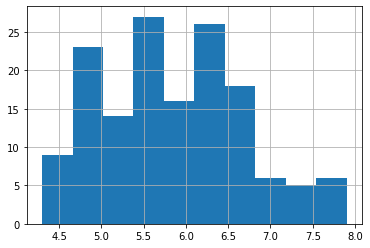

In [11]:
df['SepalLengthCm'].hist()

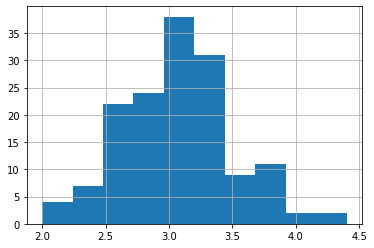

In [12]:
df['SepalWidthCm'].hist()

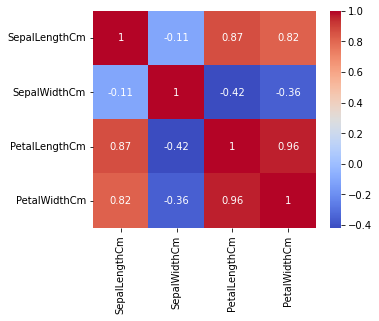

In [13]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [14]:
px.scatter(df, x='Species', y='PetalWidthCm')

In [15]:
px.line(df, x='Species', y='PetalWidthCm')

In [16]:
px.scatter(df, x='Species', y='PetalLengthCm')

In [17]:
px.scatter(df, x='Species', y='SepalLengthCm')

In [18]:
px.scatter(df, x='Species', y='SepalWidthCm')

In [56]:
px.scatter_matrix(df, color='Species', title='Iris', dimensions=['SepalLengthCm','SepalWidt
'PetalLengthCm','PetalWid

SyntaxError: ignored

In [27]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

In [28]:
for i in range(3):
x = df[df['Species'] == species[i]]
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

IndentationError: ignored

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model = DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [47]:
data = 8,3.755,7,2.1 

In [39]:
data_array = np.array([data])
data_array

array([[8.   , 3.755, 7.   , 2.1  ]])

In [52]:
predic = model.predict(data_array)

ValueError: ignored

In [48]:
catagory = ['Iris-Satosa','Iris-Versicolor','Iris-Virginica']

In [54]:
print(catagory[int(predic[0])])

NameError: ignored

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



ValueError: ignored